#Load and explore the dataset

In [19]:
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


#Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#Visualize the data distribution

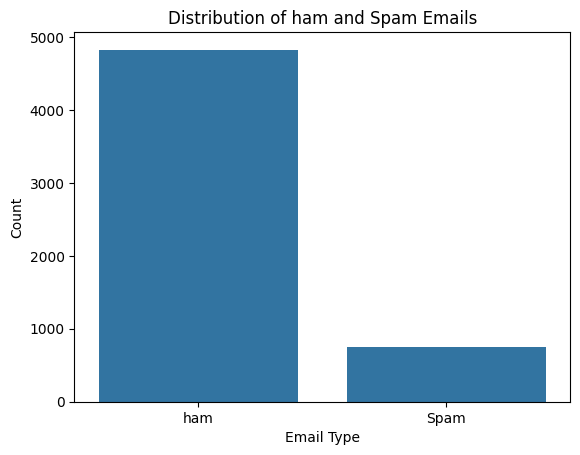

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=df)
plt.title('Distribution of ham and Spam Emails')
plt.xticks([0, 1], ['ham', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

#Train the model

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

#Evaluate the model

In [23]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = nb_classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



#Visualize the confusion matrix

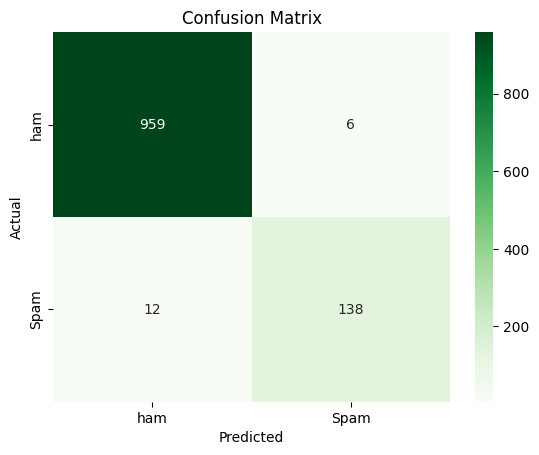

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['ham', 'Spam'], yticklabels=['ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Test the Model with Sample Emails

In [26]:
sample_emails = [
    "Congratulations! You've won a free ticket to the Bahamas. Call now!",
    "Can we reschedule our meeting to next Tuesday?",
    "You've been selected for a limited-time offer. Act now!",
    "Are you available for a quick call tomorrow?"
]
sample_emails_vec = vectorizer.transform(sample_emails)
predictions = nb_classifier.predict(sample_emails_vec)
predicted_labels = le.inverse_transform(predictions)
for email, label in zip(sample_emails, predicted_labels):
    print(f'Email: "{email}" - Predicted: {label}')

Email: "Congratulations! You've won a free ticket to the Bahamas. Call now!" - Predicted: spam
Email: "Can we reschedule our meeting to next Tuesday?" - Predicted: ham
Email: "You've been selected for a limited-time offer. Act now!" - Predicted: ham
Email: "Are you available for a quick call tomorrow?" - Predicted: ham
